<img src='https://images.immediate.co.uk/production/volatile/sites/10/2022/02/2048-1365-iris-reticulata-c31b7f7.jpg?quality=90&webp=true&resize=1200,800'>

### Iris Flowers

#### Stage 1. Data loading

Import Statements

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [106]:
iris = load_iris()

In [107]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [108]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [109]:
iris_df.shape

(150, 4)

#### Stage 2. Pre-processing of data

In [110]:

iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Data Normalization

In [111]:
scaler = StandardScaler()

In [112]:
iris_scaled = scaler.fit_transform(iris_df)

In [113]:
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)

In [114]:
iris_df_scaled.round(2).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32


#### Stage 3. Exploratory Data Analysis

Let's put our data in variable X,
Of course, we don’t have a target variable

In [115]:
X = iris_df_scaled

In [116]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


#### Stage 4. Model Training

We use the elbow method.

In [117]:
wcss = []

In [118]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

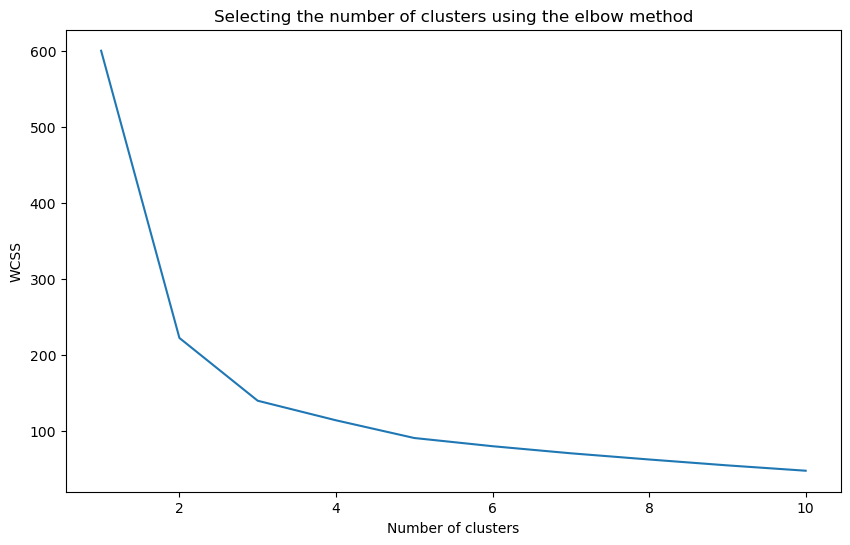

In [119]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss)
plt.title('Selecting the number of clusters using the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Retrain the model with three clusters

In [120]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

Let's train the model and make a prediction:

In [121]:
y_pred = kmeans.fit_predict(X)

#### Stage 5.2. Model quality assessment

It remains to check the quality of the model, and this is where the difficulty arises. After all, if during training with a teacher we had a criterion (target variable), then here there is no such criterion.

However, since we have a training dataset, and we know in advance what species each flower belongs to, we can compare the result of our model with the target variable.

In [122]:
kmeans.inertia_

139.82049635974982

In [123]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [124]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [125]:
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    y_pred[i] = 0
  elif y_pred[i] == 0:
    y_pred[i] = 2
  elif y_pred[i] == 2:
    y_pred[i] = 1

In [126]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [127]:
d = {'Target' : iris.target, 'Prediction' : y_pred}

In [128]:
result = pd.DataFrame(d, columns = ['Target', 'Prediction'])
result.head(2)

,Target,Prediction
0,0,0
1,0,0


Using the where() function, we will create a Numpy array in which we compare each row of the dataframe, and if the target variable and the forecast match, we will set the value to True, otherwise - False.

In [129]:
comparison = np.where(result['Target'] == result['Prediction'], True, False)
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[ True  True  True  True  True]


In [130]:
result['Comparison'] = comparison
result.head()

,Target,Prediction,Comparison
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [131]:
result['Comparison'].value_counts(normalize = True).round(2)

Comparison
True     0.83
False    0.17
Name: proportion, dtype: float64

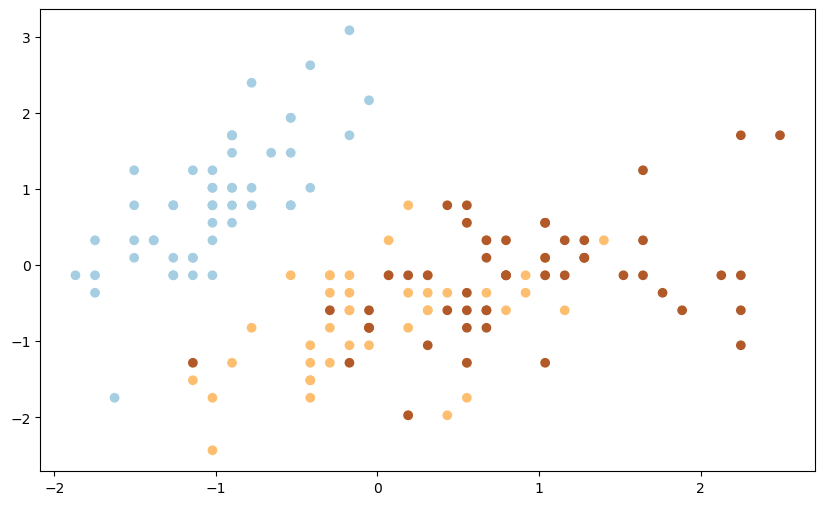

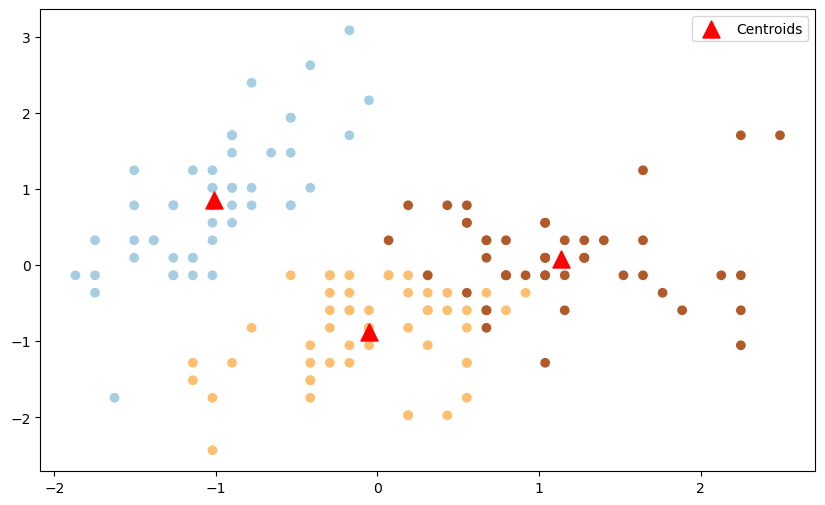

In [132]:
plt.figure(figsize = (10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = iris.target, cmap = 'Paired')
plt.show()

plt.figure(figsize = (10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y_pred, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'red', marker = '^', label = 'Centroids')
plt.legend(loc = 'upper right')
plt.show()

Conclusions. As we can see, the algorithm coped perfectly with cluster 0 (light blue), but made errors when separating clusters 1 and 2 (yellow and brown).

In fact, it's all about the algorithm itself. As we said above, the algorithm groups data around centroids, which means it works well with clusters that are convex and widely spaced. As soon as the data "penetrates each other" and is located too close, the algorithm is lost.

In [133]:
X = iris_df_scaled.iloc[:,[2,3]]

In [134]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_pred = kmeans.fit_predict(X)

In [135]:
kmeans.inertia_

18.026962612544068

In [136]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [137]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [138]:
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    y_pred[i] = 0
  elif y_pred[i] == 0:
    y_pred[i] = 2
  elif y_pred[i] == 2:
    y_pred[i] = 1

In [139]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [140]:
d = {'Target' : iris.target, 'Prediction' : y_pred}

In [141]:
result = pd.DataFrame(d, columns = ['Target', 'Prediction'])
result.head(2)

,Target,Prediction
0,0,0
1,0,0


In [142]:
comparison = np.where(result['Target'] == result['Prediction'], True, False)
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[ True  True  True  True  True]


In [143]:
result['Comparison'] = comparison
result.head()

,Target,Prediction,Comparison
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [144]:
result['Comparison'].value_counts(normalize = True).round(2)

Comparison
True     0.96
False    0.04
Name: proportion, dtype: float64

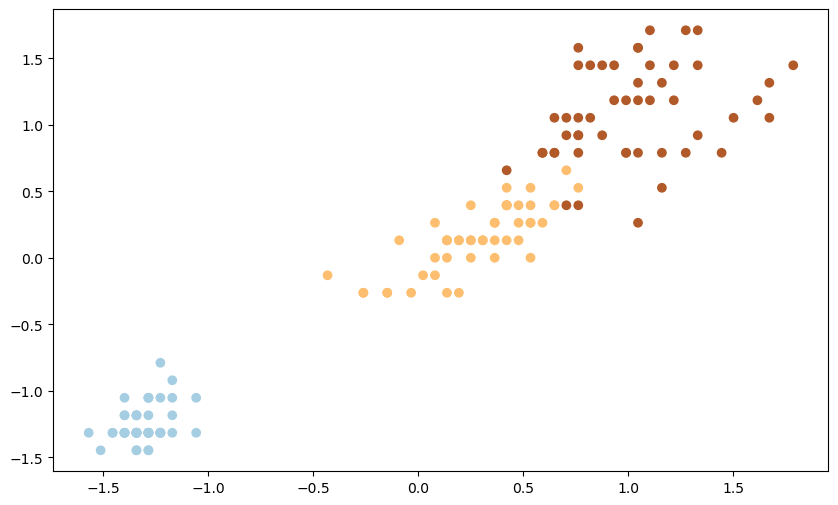

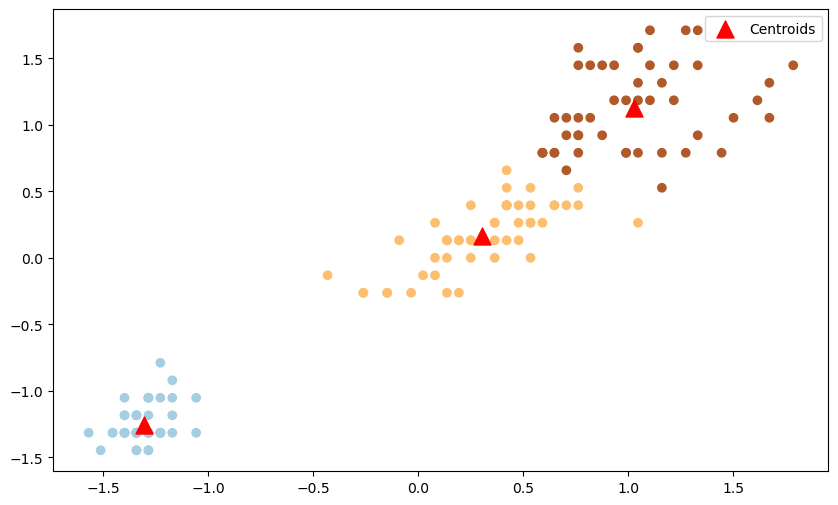

In [145]:
plt.figure(figsize = (10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = iris.target, cmap = 'Paired')
plt.show()

plt.figure(figsize = (10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y_pred, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'red', marker = '^', label = 'Centroids')
plt.legend(loc = 'upper right')
plt.show()

After using only two last columns for our model we received more accuracy. This accuracy is shown as per cent comparison and plots.